<a href="https://colab.research.google.com/github/rgukhui/cm4709/blob/main/Lab06_(PyTorch_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CM4709 Computer Vision
#Lab 06 Object Detection using YOLO

##Aims
1. Use YOLO for object detection.

##Uploading Testing Images
We will need some testing images.
There are a few in Moodle. You can also add some of your own.
Upload them to a folder in your GoogleDrive. e.g. `cm4709/Lab06/data`.

##Mounting GoogleDrive

It is faster and easier uploading to GoogleDrive than to a Colab runtime.
The following standard code connects your GoogleDrive space to Colab.
After this, your image folder should be visible in your Colab runtime.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Install YOLO v8

There are a few implementation of YOLO:
1. [Darknet](https://pjreddie.com/darknet/): This is the official release and is the fastest.
1. [Darkflow](https://github.com/thtrieu/darkflow): This is the Tensorflow version of Darknet.
1. [OpenCV](https://opencv-tutorial.readthedocs.io/en/latest/yolo/yolo.html): This is the OpenCV Implementation of YOLO. As YOLO is a CNN, you can also export a trained YOLO network to a ONNX file and run it in OpenCV C++. This is useful if you want to deploy a trained YOLO network to another platform.
1. [PyTorch](https://docs.ultralytics.com/): Ultralytics has released multiple versions of YOLO in Python. If you want the most up-to-date version, this will be the one to use.

In [2]:
#
#install YOLO v8
#
!pip install ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/107.7 GB disk)


##Object Detection Using Command Line

The following command line loads the pretrained COCO `yolov8s.pt` weights and detects objects in an image.
Output will be saved in the folder `runs/detect/predict`.

In [3]:
!yolo predict model=yolov8s.pt source='/content/gdrive/MyDrive/cm4709/Lab06/data/mumbai-traffic.jpg'

100% 21.5M/21.5M [00:00<00:00, 166MB/s]
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

image 1/1 /content/gdrive/MyDrive/cm4709/Lab06/data/mumbai-traffic.jpg: 384x640 9 persons, 24 cars, 2 buss, 1 truck, 1 traffic light, 491.6ms
Speed: 16.3ms preprocess, 491.6ms inference, 2631.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


##Seeing the COCO Classes

The YOLO weights we loaded are trained with the [COCO dataset](https://cocodataset.org/). The COCO class names are in the result of detection.
The following code does object detecton on a testing image and print out the number of classes and the class labels.

The result documentation is [here](https://docs.ultralytics.com/modes/predict/#working-with-results). Note the followings:
1. We are feeding in 1 image in our example. Thus we are taking the first result.
1. The class names are in the `names` property of the result.

In [58]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from ultralytics import YOLO


#our 3 testing images
image1='/content/gdrive/MyDrive/cm4709/Lab06/data/mumbai-traffic.jpg'
image2='/content/gdrive/MyDrive/cm4709/Lab06/data/test.jpg'
image3='/content/gdrive/MyDrive/cm4709/Lab06/data/bluetit.png'
image=[image1,image2,image3]

model = YOLO('yolov8s.pt')  # load a pretrained YOLOv8s detection model
results=model(image)  # predict on an image
result=results[0]     #get 1st result
classNames=result.names #get class names

print('No. of classes: ',len(classNames))
print(classNames)


0: 640x640 10 persons, 25 cars, 1 motorcycle, 2 buss, 1 truck, 1 traffic light, 765.4ms
1: 640x640 5 persons, 1 chair, 1 potted plant, 1 dining table, 7 laptops, 2 cell phones, 765.4ms
2: 640x640 2 birds, 765.4ms
Speed: 6.5ms preprocess, 765.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
No. of classes:  80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bo

##Understanding the Detection Result

The Ultralytics library's detection function accepts multiple images in a list, and the results are returned as another list. Each result contains information of the class confidence score and bounding boxes. You can find documentation of the result [here](https://docs.ultralytics.com/modes/predict/).

The following code examines structure of the detection result.

In [59]:
#Note: variable "results" is instantiated above

print('No. of results: ',len(results))

#go through all results
for result in results:
  boxes=result.boxes                    #get all boxes in this result
  print('  No. of boxes: ',len(boxes))
  for box in result.boxes:              #go through all boxes
    classIndex=box.cls                  #get class index
    confidence=box.conf                 #get confidence
    xywh=box.xywh                       #get bounding box
    print('    class index: ',classIndex)
    print('    confidence: ',confidence)
    print('    xywh: ',xywh)

No. of results:  3
  No. of boxes:  40
    class index:  tensor([2.])
    confidence:  tensor([0.8852])
    xywh:  tensor([[265.3489, 612.7486, 338.5524, 165.2148]])
    class index:  tensor([2.])
    confidence:  tensor([0.8723])
    xywh:  tensor([[ 74.0114, 473.0641, 147.6616, 137.0359]])
    class index:  tensor([2.])
    confidence:  tensor([0.8582])
    xywh:  tensor([[1039.3484,  658.2108,  477.4727,  114.0037]])
    class index:  tensor([2.])
    confidence:  tensor([0.8463])
    xywh:  tensor([[858.7861, 637.0692, 329.6996, 157.1233]])
    class index:  tensor([2.])
    confidence:  tensor([0.8220])
    xywh:  tensor([[1117.3088,  443.9008,  321.9874,  154.5272]])
    class index:  tensor([2.])
    confidence:  tensor([0.8178])
    xywh:  tensor([[1216.2410,  553.7997,  126.7554,  133.9468]])
    class index:  tensor([2.])
    confidence:  tensor([0.8109])
    xywh:  tensor([[941.2100, 489.8020, 341.4423, 154.1270]])
    class index:  tensor([2.])
    confidence:  tensor([0.81

##Processing the Result

The results are "tensors".
The following code extract the values and store them into 2 lists: 1 for the images, and 1 for the boxes detected.

In [60]:
#minimum confidence required
confidenceThreshold=0.5

#lists to collect results
originalImages=[]
detectionResults=[]

for result in results:
  img=result.orig_img       #get original image
  originalImages.append(img)  #append image to list
  boxResults=[]
  for box in result.boxes:  #go through all boxes
    #
    #compute values from tensors
    #
    [classIndex]=box.cls.cpu().numpy()    #get class index of box
    classIndex=int(classIndex)            #convert to int
    label=classNames[classIndex]          #get class name as label
    [confidence]=box.conf.cpu().numpy()   #get box confidence
    label=label+' '+str(confidence)       #append confidence to label
    [[x,y,w,h]]=box.xywh.cpu().numpy()    #get box centre, width and height
    topx=int(x-w/2)       #compute box top left corner
    topy=int(y-h/2)
    bottomx=int(topx+w)   #compute box bottom right corner
    bottomy=int(topy+h)
    #
    #append box result to list
    #
    if confidence>=confidenceThreshold:
      boxResults.append((classIndex,confidence,label,(topx,topy,bottomx,bottomy)))
  detectionResults.append(boxResults)

#
#print out computed results
#
for boxResults in detectionResults:
  print('Image detection result:')
  boxIndex=0
  for boxResult in boxResults:
    (classIndex,confidence,label,(topx,topy,bottomx,bottomy))=boxResult
    print('  box no.: ',boxIndex)
    print('    class index: ',classIndex)
    print('    confidence: ',confidence)
    print('    label: ',label)
    print('    box: ',(topx,topy,bottomx,bottomy))
    boxIndex=boxIndex+1

Image detection result:
  box no.:  0
    class index:  2
    confidence:  0.88516146
    label:  car 0.88516146
    box:  (96, 530, 434, 695)
  box no.:  1
    class index:  2
    confidence:  0.87231207
    label:  car 0.87231207
    box:  (0, 404, 147, 541)
  box no.:  2
    class index:  2
    confidence:  0.85821366
    label:  car 0.85821366
    box:  (800, 601, 1277, 715)
  box no.:  3
    class index:  2
    confidence:  0.84631914
    label:  car 0.84631914
    box:  (693, 558, 1022, 715)
  box no.:  4
    class index:  2
    confidence:  0.82200235
    label:  car 0.82200235
    box:  (956, 366, 1277, 520)
  box no.:  5
    class index:  2
    confidence:  0.8177674
    label:  car 0.8177674
    box:  (1152, 486, 1278, 619)
  box no.:  6
    class index:  2
    confidence:  0.8109221
    label:  car 0.8109221
    box:  (770, 412, 1111, 566)
  box no.:  7
    class index:  2
    confidence:  0.8099685
    label:  car 0.8099685
    box:  (129, 422, 592, 560)
  box no.:  8
    c

##Visualising the Results

We can now visualise the bounding boxes.

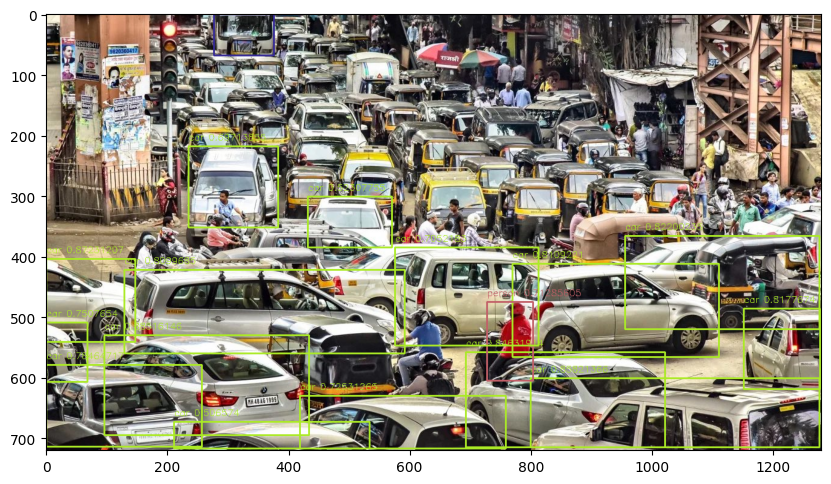

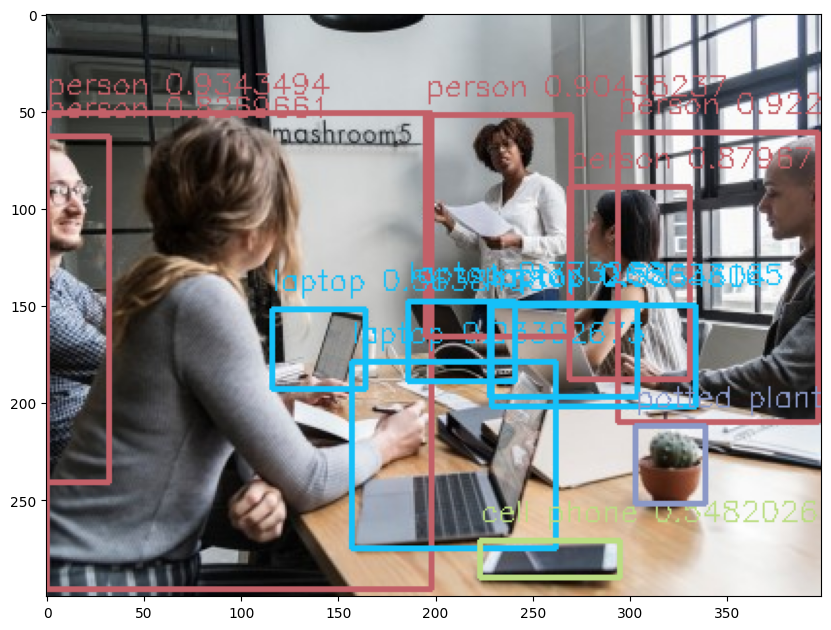

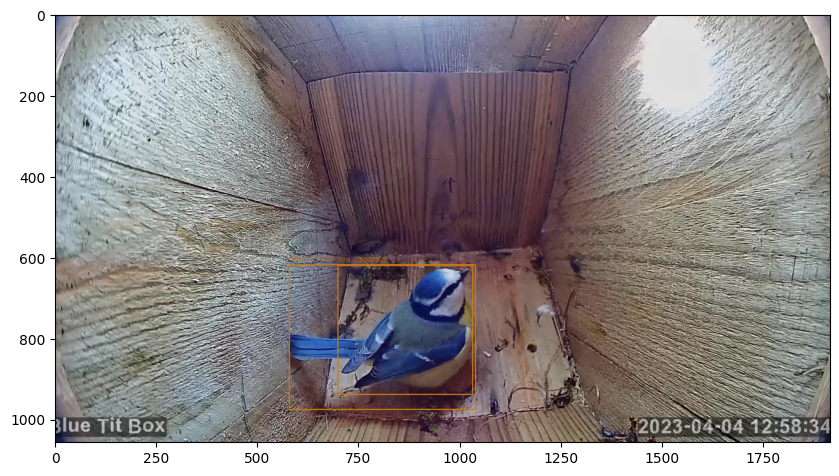

In [61]:
#font to be used in label
font = cv.FONT_HERSHEY_SIMPLEX

#generate random colours for the classes
colours = np.random.uniform(0, 255, size=(len(classNames), 3))

#
#go through all images
#
for index in range(0,len(originalImages)):
  image=originalImages[index]         #take out the image
  boxResults=detectionResults[index]  #get all box results of this image
  for boxResult in boxResults:        #go through all boxes in this result
    (classIndex,confidence,label,(topx,topy,bottomx,bottomy))=boxResult
    colour = colours[classIndex]                 #get colour
    cv.rectangle(image, (topx,topy), (bottomx,bottomy), colour, 2)  #draw bounding box
    cv.putText(image, label, (topx,topy -10), font, 0.5, colour)    #draw class label
  #
  #show image
  #
  plt.figure(figsize=(10,10))
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
